In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0],coordinate[1]).country_code)


ovalle cl
albany au
port alfred za
rikitea pf
puerto ayora ec
amderma ru
trairi br
mogadishu so
opuwo na
saldanha za
arraial do cabo br
bichena et
hambantota lk
ushuaia ar
shache cn
kapaa us
punta arenas cl
grindavik is
nikolskoye ru
pevek ru
hermanus za
pogar ru
tokur ru
tura ru
qaanaaq gl
zhuhai cn
atar mr
kyabe td
nome us
albany au
tasiilaq gl
punta arenas cl
tsihombe mg
rikitea pf
ushuaia ar
straumen no
cabo san lucas mx
angoram pg
yatou cn
albury au
mataura pf
komyshuvakha ua
luganville vu
ushuaia ar
ushuaia ar
shahrud ir
cape town za
umba ru
bredasdorp za
umm lajj sa
norman wells ca
barbar sd
vila franca do campo pt
rikitea pf
yakovlevka ru
albany au
ust-tsilma ru
tuktoyaktuk ca
atuona pf
mys shmidta ru
saleaula ws
nacogdoches us
tasiilaq gl
illoqqortoormiut gl
guder et
naze jp
saint anthony ca
pevek ru
bilibino ru
kapaa us
bundaberg au
paradwip in
kapaa us
nizhneyansk ru
iquique cl
lebu cl
zhangye cn
busselton au
urengoy ru
vao nc
airai pw
taolanaro mg
tagusao ph
nanortalik gl
n

nikolskoye ru
laibin cn
mataura pf
ushuaia ar
nowy dwor gdanski pl
khatanga ru
pemangkat id
batagay-alyta ru
nikolskoye ru
san patricio mx
kinna se
masuguru tz
pacific grove us
cabo san lucas mx
amderma ru
oxford us
moerai pf
sungairaya id
srednekolymsk ru
laguna br
ahipara nz
punta arenas cl
nanortalik gl
punta arenas cl
san quintin mx
kapaa us
mataura pf
butaritari ki
nizhneyansk ru
olafsvik is
avarua ck
ballina ie
cape town za
tabou ci
carnarvon au
severo-kurilsk ru
mataura pf
dingle ie
nanortalik gl
ushuaia ar
voi ke
barrow us
beloha mg
kapaa us
taolanaro mg
farafangana mg
egvekinot ru
yanan cn
atuona pf
chokurdakh ru
sao miguel do araguaia br
atuona pf
jamestown sh
rikitea pf
mataura pf
padang id
flinders au
ambon id
saint-prosper ca
barrow us
bethel us
jumla np
hun ly
arlit ne
puerto ayora ec
port blair in
dubrovka ru
grand river south east mu
bethel us
dunedin nz
rikitea pf
ushuaia ar
ushuaia ar
khandagayty ru
thompson ca
mataura pf
rocha uy
mataura pf
hobart au
lodwar ke
laguna

rikitea pf
longyearbyen sj
rikitea pf
albany au
rio grande br
illoqqortoormiut gl
kota bahru my
barrow us
san patricio mx
bluff nz
tazovskiy ru
ardahan tr
gouyave gd
barrow us
sibolga id
nikolskoye ru
rikitea pf
arraial do cabo br
kotturu in
ushuaia ar
hithadhoo mv
nanortalik gl
lavrentiya ru
mar del plata ar
bredasdorp za
severo-kurilsk ru
husavik is
vaitupu wf
ust-maya ru
samusu ws
yellowknife ca
busselton au
tuktoyaktuk ca
kiama au
kendari id
port alfred za
laguna br
saint-philippe re
kapaa us
luderitz na
east london za
ponta do sol cv
hilo us
nanortalik gl
albany au
qingdao cn
nelson bay au
lompoc us
prince rupert ca
cape town za
saurimo ao
mecca sa
gat ly
vaini to
port alfred za
san patricio mx
shenjiamen cn
port alfred za
garwa in
kieta pg
nizhneyansk ru
boa vista br
chifeng cn
nikolskoye ru
kavieng pg
talnakh ru
cuiluan cn
knysna za
tuktoyaktuk ca
hermanus za
atambua id
illoqqortoormiut gl
yarada in
punta arenas cl
hryshkivtsi ua
gao ml
rikitea pf


In [9]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

611

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ovalle
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | trairi
Processing Record 8 of Set 1 | mogadishu
Processing Record 9 of Set 1 | opuwo
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | bichena
Processing Record 13 of Set 1 | hambantota
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | shache
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | pogar
Processing Record 23 of Set 1 | tokur
Processing Record 24 of Set 1 | tura
Proc

Processing Record 37 of Set 4 | tucuma
Processing Record 38 of Set 4 | faya
Processing Record 39 of Set 4 | kloulklubed
Processing Record 40 of Set 4 | gizo
Processing Record 41 of Set 4 | chagda
City not found. Skipping...
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | neiafu
Processing Record 44 of Set 4 | kamra
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | oranjestad
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | rundu
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | muros
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | gat
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | saint-prosper
Processing Record 30 of Set 8 | jumla
Processing Record 31 of Set 8 | arlit
Processing Record 32 of Set 8 | dubrovka
Processing Record 33 of Set 8 | khandagayty
Processing Record 34 of Set 8 | rocha
Processing Record 35 of Set 8 | lodwar
Processing Record 36 of Set 8 | aksarka
Processing Record 37 of Set 8 | camana
Processing Record 38 of Set 8 | berbera
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | usinsk
Processing Record 41 of Set 8 | aksu
Processing Record 42 of Set 8 | sechura
Processing Record 43 of Set 8 | roald
Processing Record 44 of Set 8 | narsaq
Processing Record 45 of Set 8 | inuvik
Processing Record 46 of Set 8 | ozernovskiy
Processing Record 47 of Set 8 | guangyuan
Processing Record 48 of Set 8 | sur
Processing Record 49 of Set 8 | sarakhs
Processing Record 50 of Set 8 | taoudenni
Processing Record 1 of Set 9 | peniche
Processing Record 2 of Set 9 | chengzih

Processing Record 17 of Set 12 | hudiksvall
Processing Record 18 of Set 12 | calbuco
Processing Record 19 of Set 12 | balaghat
Processing Record 20 of Set 12 | richards bay
Processing Record 21 of Set 12 | sambava
Processing Record 22 of Set 12 | cacapava do sul
Processing Record 23 of Set 12 | saveh
Processing Record 24 of Set 12 | jiutai
Processing Record 25 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 26 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 27 of Set 12 | saint-pierre
Processing Record 28 of Set 12 | venice
Processing Record 29 of Set 12 | siderno
Processing Record 30 of Set 12 | tangshan
Processing Record 31 of Set 12 | dzhebariki-khaya
Processing Record 32 of Set 12 | loukhi
Processing Record 33 of Set 12 | oil city
Processing Record 34 of Set 12 | nhulunbuy
Processing Record 35 of Set 12 | simav
Processing Record 36 of Set 12 | halifax
Processing Record 37 of Set 12 | kharan
Processing Record 38 of Set 12 | kota bah

In [12]:
len(city_data)

564

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ovalle,-30.5983,-71.2003,59.22,66,0,2.28,CL,2021-09-27 03:42:20
1,Albany,42.6001,-73.9662,54.52,90,6,4.59,US,2021-09-27 03:42:20
2,Port Alfred,-33.5906,26.8910,65.25,82,28,19.91,ZA,2021-09-27 03:42:21
3,Rikitea,-23.1203,-134.9692,73.76,72,8,19.28,PF,2021-09-27 03:38:29
4,Puerto Ayora,-0.7393,-90.3518,68.63,92,66,7.23,EC,2021-09-27 03:42:21
5,Trairi,-3.2778,-39.2689,78.71,81,39,13.89,BR,2021-09-27 03:37:31
6,Mogadishu,2.0371,45.3438,76.87,88,40,18.41,SO,2021-09-27 03:42:22
7,Opuwo,-18.0607,13.8400,63.63,42,0,0.94,NA,2021-09-27 03:42:22
8,Saldanha,-33.0117,17.9442,53.65,90,5,14.23,ZA,2021-09-27 03:42:23
9,Arraial Do Cabo,-22.9661,-42.0278,70.86,88,66,19.26,BR,2021-09-27 03:42:23


In [14]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ovalle,CL,2021-09-27 03:42:20,-30.5983,-71.2003,59.22,66,0,2.28
1,Albany,US,2021-09-27 03:42:20,42.6001,-73.9662,54.52,90,6,4.59
2,Port Alfred,ZA,2021-09-27 03:42:21,-33.5906,26.8910,65.25,82,28,19.91
3,Rikitea,PF,2021-09-27 03:38:29,-23.1203,-134.9692,73.76,72,8,19.28
4,Puerto Ayora,EC,2021-09-27 03:42:21,-0.7393,-90.3518,68.63,92,66,7.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

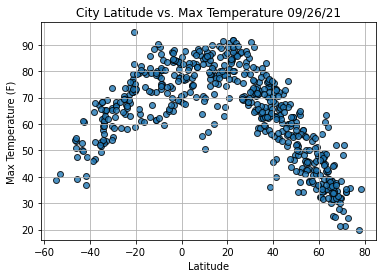

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

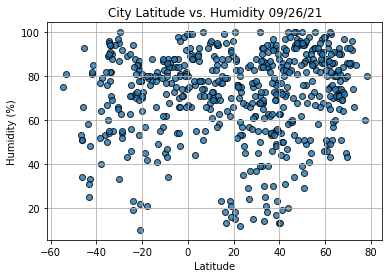

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

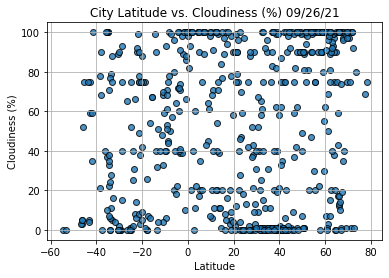

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

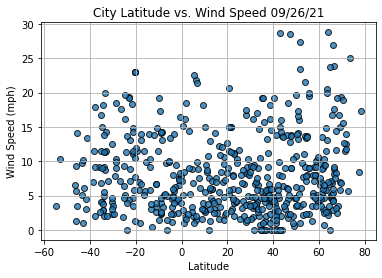

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

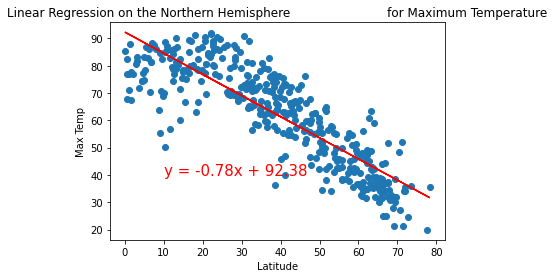

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

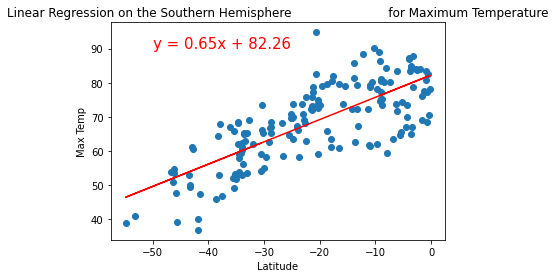

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

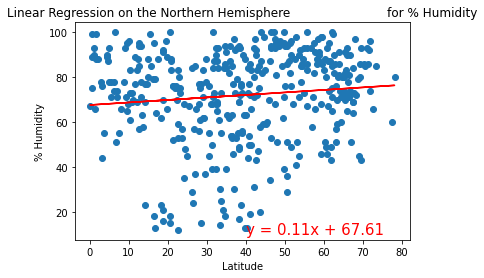

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

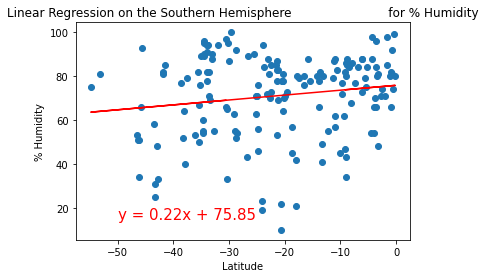

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [31]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2021-09-27 03:42:20,42.6001,-73.9662,54.52,90,6,4.59
6,Mogadishu,SO,2021-09-27 03:42:22,2.0371,45.3438,76.87,88,40,18.41
10,Bichena,ET,2021-09-27 03:42:23,10.4500,38.2000,50.41,83,6,2.82
11,Hambantota,LK,2021-09-27 03:42:24,6.1241,81.1185,82.74,78,75,21.85
13,Shache,CN,2021-09-27 03:42:24,38.4167,77.2406,74.48,17,0,4.21
...,...,...,...,...,...,...,...,...,...
557,Talnakh,RU,2021-09-27 03:45:36,69.4865,88.3972,38.46,43,97,6.80
558,Cuiluan,CN,2021-09-27 03:45:37,47.7200,128.6480,60.28,95,100,9.04
561,Yarada,IN,2021-09-27 03:45:38,17.6500,83.2667,80.24,88,100,12.01
562,Hryshkivtsi,UA,2021-09-27 03:45:38,49.9353,28.6038,42.28,95,7,6.20


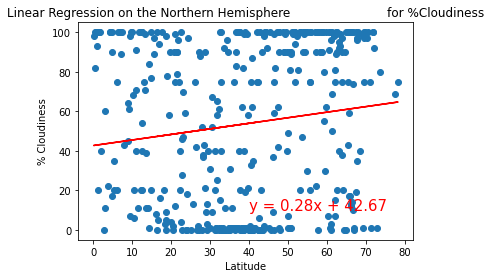

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(40,10))

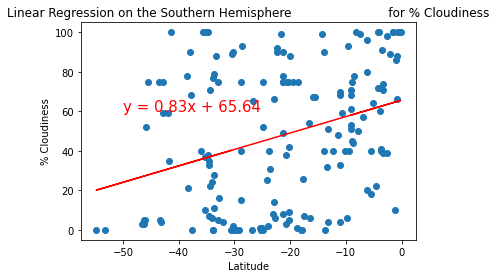

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

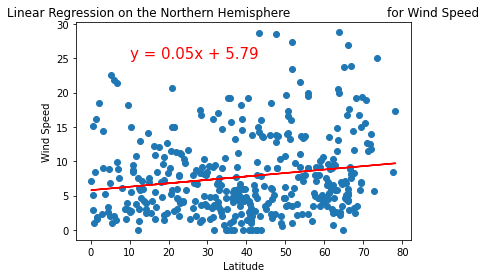

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

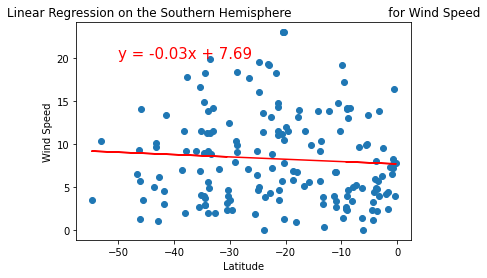

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))